In [21]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("ab_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


***1 - cancelling a null value***

In [4]:
df[df["group"].isnull()]['group']

Series([], Name: group, dtype: object)

In [7]:
################
df.isnull().any()
df[df['group']=='Null']
df.drop(df[df['group']=='Null'].index)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [6]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

***2 - cancelling a data misleading***

In [2]:
(df[df['group']=='treatment']['landing_page']!='new_page').sum()+(df[df['landing_page']=='new_page']['group']!='treatment').sum()

3893

In [3]:
ds=df.query('group=="treatment" and landing_page!="new_page"')
ds=ds.append(df.query('group!="treatment" and landing_page=="new_page"'))
df2=df.drop(ds.index)
(df2[df2['group']=='treatment']['landing_page']!='new_page').sum()+(df2[df2['group']!='treatment']['landing_page']=='new_page').sum()

0

***3 - cancelling the duplication***

In [4]:
df2.shape

(290585, 5)

In [5]:
df2['user_id'].nunique()

290584

In [6]:
df2['user_id'].value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
         ..
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

In [7]:
df4=df2['user_id'].value_counts()
df4[df4>1].index

Int64Index([773192], dtype='int64')

In [8]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [10]:
df2.drop_duplicates('user_id',inplace=True)
#df2=df2.drop(index=1899)
#df2['user_id'].value_counts().nunique()

***Hypothesis Testing (A/B Testing)***

In [30]:
p_old=df2['converted'].mean()
p_new=df2['converted'].mean()
n_new=len(df2[df2['group']=='treatment'])
n_old=len(df2[df2['group']=='control'])

(array([  45.,  232.,  904., 2130., 2875., 2309., 1134.,  323.,   42.,
           6.]),
 array([-0.00409743, -0.00320612, -0.00231482, -0.00142352, -0.00053222,
         0.00035909,  0.00125039,  0.00214169,  0.00303299,  0.0039243 ,
         0.0048156 ]),
 <BarContainer object of 10 artists>)

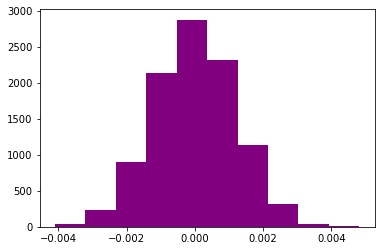

In [31]:
import numpy as np
p_diffs=[]
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation
p_diffs=np.array(p_diffs)
plt.hist(p_diffs,color = 'purple')

In [24]:
obs_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
(p_diffs > obs_diff).mean()

0.9064

In [25]:
import statsmodels.api as sm

convert_old = df2.query('group=="control"').query('converted==1').shape[0]
convert_new = df2.query('group=="treatment"').query('converted==1').shape[0]
n_old = df2.query('group=="control"').shape[0]
n_new = df2.query('group=="treatment"').shape[0]
z_score, pval=sm.stats.proportions_ztest(np.array([(convert_new),(convert_old)]),np.array([n_new,n_old]),alternative='larger')
pval,z_score

(0.9050583127590245, -1.3109241984234394)

In [15]:
x = pd.read_csv('classroom_actions.csv')
x.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [16]:
obs_diff = x[x.group=='experiment'].total_days.mean() - x[x.group=='control'].total_days.mean()
obs_diff

1.3026031488719099

In [17]:
x.shape

(3829, 5)

(array([   5.,   19.,  221., 1001., 2461., 3183., 2171.,  763.,  163.,
          13.]),
 array([-1.92093324, -1.32519724, -0.72946123, -0.13372523,  0.46201078,
         1.05774678,  1.65348278,  2.24921879,  2.84495479,  3.4406908 ,
         4.0364268 ]),
 <BarContainer object of 10 artists>)

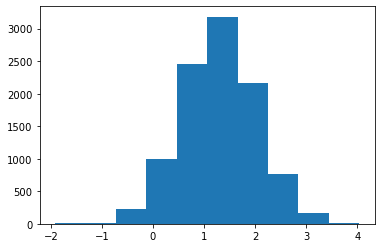

In [28]:
import matplotlib.pyplot as plt
diff=[]
for _ in range(10000):
    sample = x.sample(x.shape[0],replace=True)
    diff.append(sample[sample.group=='experiment'].total_days.mean() - sample[sample.group=='control'].total_days.mean())
plt.hist(diff)

(array([  16.,  124.,  561., 1647., 2797., 2609., 1540.,  546.,  147.,
          13.]),
 array([-2.62538292, -2.09662273, -1.56786254, -1.03910235, -0.51034216,
         0.01841803,  0.54717823,  1.07593842,  1.60469861,  2.1334588 ,
         2.66221899]),
 <BarContainer object of 10 artists>)

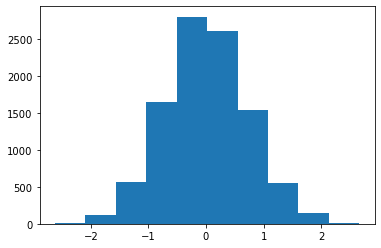

In [33]:
x = np.array(diff)
#np.std(diff)
#np.
null = np.random.normal(0,x.std(),x.size)
plt.hist(null)

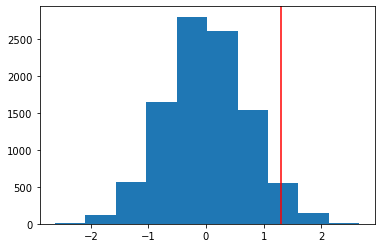

In [34]:
plt.hist(null)
plt.axvline(x = obs_diff,color = 'red')

In [45]:
(null>obs_diff).mean()


0.0394

In [47]:
y = pd.read_csv('coffee_dataset.csv')
y.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [48]:
obs_diff = y[y.drinks_coffee==True].height.mean() - y[y.drinks_coffee==False].height.mean()
obs_diff

1.9568024933369657

In [49]:
y.shape

(2974, 4)

(array([1.800e+01, 1.690e+02, 7.390e+02, 1.953e+03, 2.959e+03, 2.583e+03,
        1.182e+03, 3.430e+02, 5.200e+01, 2.000e+00]),
 array([1.53275182, 1.62279074, 1.71282966, 1.80286857, 1.89290749,
        1.98294641, 2.07298532, 2.16302424, 2.25306316, 2.34310207,
        2.43314099]),
 <BarContainer object of 10 artists>)

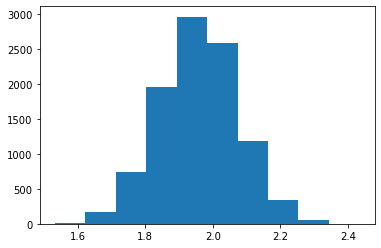

In [54]:
v=[]
for _ in range(10000):
    sample = y.sample(y.shape[0],replace=True)
    v.append(sample[sample.drinks_coffee==True].height.mean() - sample[sample.drinks_coffee==False].height.mean())
plt.hist(v)

(array([  17.,  135.,  640., 1739., 2768., 2676., 1471.,  463.,   79.,
          12.]),
 array([-0.43117574, -0.34314129, -0.25510683, -0.16707237, -0.07903792,
         0.00899654,  0.097031  ,  0.18506545,  0.27309991,  0.36113436,
         0.44916882]),
 <BarContainer object of 10 artists>)

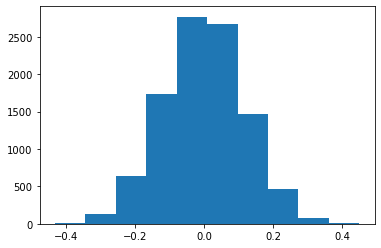

In [55]:
c = np.array(v)

null = np.random.normal(0,c.std(),c.size)
plt.hist(null)

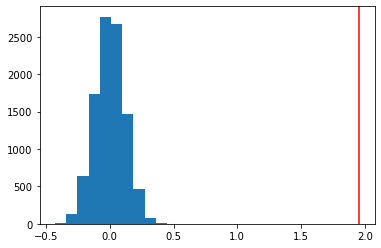

In [56]:
plt.hist(null)
plt.axvline(x = obs_diff,color = 'red')

In [57]:
(null>obs_diff).mean()

0.0